![Python_logo](https://www.python.org/static/community_logos/python-logo-master-v3-TM.png)


 # **Cortex Game: Round2--Conditional Amount**

Please note that you need to run this notebook 'Round2--Conditional Amount' first, before running the notebook 'Round2--Probability of Giving'.   

> Before playing the game, you need to connect to SASPy first.
>
>> If it is your first time, please follow the 4 steps mentioned below!

***
## **Connect to SASPy**

**0- Connect to your Google Drive folder**

In [141]:
my_folder = "/content/drive/MyDrive/ConcentracionAI/B2/SAS_Edu"

from google.colab import drive
drive.mount('/content/drive')

# Change the following code to set your Drive folder
import os
os.chdir(my_folder)
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/ConcentracionAI/B2/SAS_Edu


**1- Make sure that your Python version is 3.3 or higher as well as your Java version is 1.8.0_162 or higher**

In [142]:
!echo "Python is at" $(which python)
!python --version

Python is at /usr/local/bin/python
Python 3.8.15


In [143]:
!echo "Java is at" $(which java)
!/usr/bin/java -version

Java is at /usr/bin/java
openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)


**2- Install SASPy**

In [144]:
pip install saspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**3- Create the configuration file "sascfg_personal.py"**
Please, check that your Home Region is correct, you can check it at [ODA-SAS](https://welcome.oda.sas.com/home)

In [145]:
%%writefile sascfg_personal.py
SAS_config_names=['oda']
oda = {'java' : '/usr/bin/java',
#US Home Region 1
'iomhost' : ['odaws01-usw2.oda.sas.com','odaws02-usw2.oda.sas.com','odaws03-usw2.oda.sas.com','odaws04-usw2.oda.sas.com'],
#US Home Region 2
#'iomhost' : ['odaws01-usw2-2.oda.sas.com','odaws02-usw2-2.oda.sas.com'],
#European Home Region 1
#'iomhost' : ['odaws01-euw1.oda.sas.com','odaws02-euw1.oda.sas.com'],
#Asia Pacific Home Region 1
#'iomhost' : ['odaws01-apse1.oda.sas.com','odaws02-apse1.oda.sas.com'],
#Asia Pacific Home Region 2
#'iomhost' : ['odaws01-apse1-2.oda.sas.com','odaws02-apse1-2.oda.sas.com'],
'iomport' : 8591,
'authkey' : 'oda',
'encoding' : 'utf-8'
}

Overwriting sascfg_personal.py


**4- Create your .authinfo**

If there is no .authinfo file, you can create this

In [146]:
#%%writefile .authinfo
#oda user USR password PSW

Copy this file to home

In [147]:
!cp .authinfo ~/.authinfo

**5- Establish Connection (Need to do this step each time you use SASPy)**

In [148]:
import saspy
sas_session = saspy.SASsession(cfgfile=os.path.join(
    my_folder,"sascfg_personal.py"))
sas_session

Using SAS Config named: oda
SAS Connection established. Subprocess id is 1155



Access Method         = IOM
SAS Config name       = oda
SAS Config file       = /content/drive/MyDrive/ConcentracionAI/B2/SAS_Edu/sascfg_personal.py
WORK Path             = /saswork/SAS_work565A00016F26_odaws04-usw2.oda.sas.com/SAS_workDB8300016F26_odaws04-usw2.oda.sas.com/
SAS Version           = 9.04.01M6P11072018
SASPy Version         = 4.4.1
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = utf-8
Python Encoding value = utf-8
SAS process Pid value = 93990


***
## Connect to Cortex Data Sets

Load Cortex datasets from SAS Studio

In [149]:
ps = sas_session.submit("""
    libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
    """)
print(ps["LOG"])


5                                                          The SAS System                      Friday, December  2, 2022 08:30:00 AM

24         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
24       ! ods graphics on / outputfmt=png;
25         
26         
27             libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
28         
29         
30         
31         ods html5 (id=saspy_internal) close;ods listing;
32         

6                                                          The SAS System                      Friday, December  2, 2022 08:30:00 AM

33         


For local Jupyter

In [150]:
#%%SAS sas_session
#libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';

### Transform cloud SAS dataset to Python dataframe (pandas)

> For reference: 

> 1- [Pandas library](https://pandas.pydata.org/docs/user_guide/index.html)

> 2- [sklearn.model_selection for data partition](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [151]:
import pandas as pd

#comment: Transform cloud sas dataset to python dataframe(pandas) ==> might take some time.

data1 = sas_session.sasdata2dataframe(
table='hist',
libref='cortex'
)

data2 = sas_session.sasdata2dataframe(
table='target_rd2',
libref='cortex'
)

## Merge the Data

In [152]:
#Step1 Merge the Data
data_merge = pd.merge(data1, data2, on=["ID"],how="right")
data_merge = data_merge.loc[(data_merge['GaveThisYear'] ==1)]

pd.set_option('display.max_columns', None)
data_merge.sample(2)

df = data_merge

## Treating Missing Values

>Please be aware that deleting all missing values can induce a selection bias. 
Some missing values are very informative. For example, when MinGift is missing, it means that the donor never gave in the past 10 years (leading to but excluding last year). Instead of deleting this information, replacing it by 0 is more appropriate!

> A good understanding of the business case and the data can help you come up with more appropriate strategies to deal with missing values.

In [153]:
# In this case, we are replacing MinGift by 0.
# You can do the same for what you think is reasonable for dealing with the other variables.

df= df.fillna(value=0)  

df.sample(5)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear
189482,2189483.0,PLUMMER,ANGELA,1.0,17.0,14100.0,University / College,City,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20.0
954049,2954050.0,BIANCHI,THOMAS,0.0,58.0,116100.0,University / College,Suburban,10.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,30.0
485997,2485998.0,BAILEY,RYAN,0.0,17.0,25900.0,University / College,Suburban,6.0,2.0,1.0,3.0,2.0,5.0,120.0,20.0,100.0,0.0,0.0,0.0,1.0,450.0
88502,2088503.0,STEIN,LASHONDA,1.0,51.0,43200.0,High School,Suburban,7.0,0.0,0.0,4.0,2.0,7.0,40.0,20.0,20.0,0.0,0.0,0.0,1.0,30.0
52854,2052855.0,DIMARTINO,JOHN,0.0,64.0,400.0,University / College,Suburban,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0


## Exploration

In [154]:
df['Age'].describe()

count    149457.000000
mean         45.256642
std          18.915539
min          16.000000
25%          29.000000
50%          44.000000
75%          59.000000
max          90.000000
Name: Age, dtype: float64

count    27237.000000
mean         0.202408
std          0.401802
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: GaveLastYear, dtype: float64

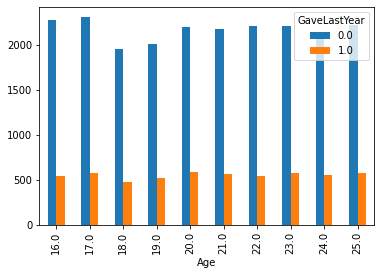

In [155]:
df_kk = df.loc[df['Age']<=25]
pd.crosstab(df_kk['Age'], df_kk['GaveLastYear']).plot(kind='bar')
df_kk['GaveLastYear'].describe()

count    66158.000000
mean         0.206339
std          0.404680
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: GaveLastYear, dtype: float64

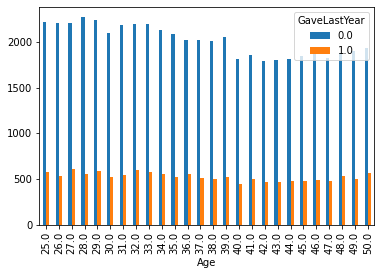

In [156]:
df_kk = df.loc[(df['Age']>=25)&(df['Age']<=50)]
pd.crosstab(df_kk['Age'], df_kk['GaveLastYear']).plot(kind='bar')
df_kk['GaveLastYear'].describe()

count    61353.000000
mean         0.213388
std          0.409703
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: GaveLastYear, dtype: float64

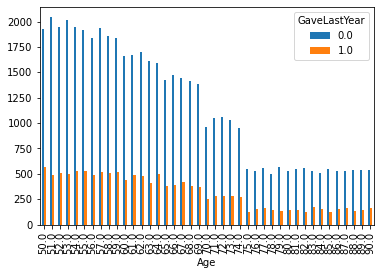

In [157]:
df_kk = df.loc[(df['Age']>=50)]
pd.crosstab(df_kk['Age'], df_kk['GaveLastYear']).plot(kind='bar')
df_kk['GaveLastYear'].describe()

## New Variables and *Dummies*

#### Average Gift

In [158]:
df['AvgGift'] = (df['TotalGift']/df['Frequency'])
df.sample(5)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear,AvgGift
43200,2043201.0,LAFAYETTE,ROBERT,0.0,75.0,42200.0,University / College,City,2.0,0.0,0.0,1.0,2.0,2.0,45.0,20.0,25.0,1.0,50.0,0.0,1.0,20.0,22.5
857281,2857282.0,DONALD,JOHNETTA,1.0,27.0,20500.0,University / College,Downtown,7.0,2.0,0.0,1.0,5.0,6.0,180.0,25.0,50.0,0.0,0.0,0.0,1.0,10.0,36.0
514737,2514738.0,BRUMIT,PETER,0.0,35.0,197100.0,University / College,Rural,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,50.0,NaN
133538,2133539.0,CARRILLO,AIDA,1.0,56.0,15400.0,Elementary,Rural,3.0,1.0,0.0,1.0,1.0,1.0,30.0,30.0,30.0,1.0,30.0,0.0,1.0,10.0,30.0
546849,2546850.0,LURIE,NANCY,1.0,38.0,22400.0,High School,City,7.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,200.0,0.0,1.0,125.0,NaN


In [159]:
df['AvgGift'].describe()

count    68433.000000
mean        66.952823
std        194.025579
min         10.000000
25%         20.000000
50%         28.750000
75%         50.000000
max      10000.000000
Name: AvgGift, dtype: float64

#### Average Participation

In [160]:
df['Seniority'] = df['Seniority']+1

In [161]:
df['AvgPart'] = (df['Frequency']/df['Seniority'])
df.sample(5)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear,AvgGift,AvgPart
573,2000574.0,VESCIO,ROLAND,0.0,29.0,200500.0,University / College,Rural,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20.0,NaN,0.00
425249,2425250.0,FIELDS,JAMIE,1.0,54.0,1200.0,High School,City,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,100.0,NaN,0.00
669989,2669990.0,RHEAD,RYAN,0.0,57.0,116700.0,High School,City,4.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20.0,NaN,0.00
833300,2833301.0,HOUSE,GEORGETTE,1.0,78.0,44200.0,University / College,City,3.0,0.0,0.0,3.0,1.0,4.0,20.0,20.0,20.0,0.0,0.0,1.0,1.0,40.0,20.0,0.25
774199,2774200.0,JACKMAN,ANDREW,0.0,23.0,46100.0,University / College,Rural,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,NaN,0.00


#### Referrals

In [162]:
df['Ref4'] = 0
df['Ref3'] = 0
df['Ref2'] = 0
df['Ref1'] = 0
df['Ref0'] = 0

In [163]:
df.loc[(df['Referrals'] >= 13), 'Ref4'] = 1
df.loc[(df['Referrals']>=9) & (df['Referrals']<13),'Ref3'] = 1
df.loc[(df['Referrals']>=5) & (df['Referrals']<9),'Ref2'] = 1
df.loc[(df['Referrals']>=1) & (df['Referrals']<5),'Ref1'] = 1
df.loc[df['Referrals']==0,'Ref0'] = 1

In [164]:
pd.set_option('display.max_columns', None)

df.sample(10)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear,AvgGift,AvgPart,Ref4,Ref3,Ref2,Ref1,Ref0
722891,2722892.0,HARDY,SALVATORE,0.0,45.0,159400.0,University / College,Downtown,7.0,1.0,0.0,7.0,1.0,8.0,10.0,10.0,10.0,0.0,0.0,0.0,1.0,10.0,10.000000,0.125000,0,0,0,0,1
586802,2586803.0,MILLER,NICOLE,1.0,36.0,27400.0,High School,City,5.0,0.0,2.0,2.0,2.0,5.0,270.0,20.0,250.0,0.0,0.0,0.0,1.0,30.0,135.000000,0.400000,0,0,0,1,0
576320,2576321.0,NEALE,NANCY,1.0,50.0,141100.0,University / College,City,1.0,1.0,0.0,1.0,1.0,2.0,30.0,30.0,30.0,1.0,20.0,0.0,1.0,20.0,30.000000,0.500000,0,0,0,0,1
816534,2816535.0,SCHICK,ANTONIO,0.0,71.0,17900.0,High School,City,8.0,3.0,3.0,7.0,2.0,9.0,90.0,20.0,70.0,0.0,0.0,0.0,1.0,20.0,45.000000,0.222222,0,0,0,1,0
188965,2188966.0,CALDWELL,BOBBY,0.0,30.0,61600.0,High School,Downtown,4.0,1.0,0.0,1.0,2.0,5.0,40.0,20.0,20.0,0.0,0.0,0.0,1.0,10.0,20.000000,0.400000,0,0,0,0,1
728788,2728789.0,LIN,MAYNARD,0.0,57.0,185400.0,University / College,City,2.0,1.0,0.0,1.0,1.0,2.0,50.0,50.0,50.0,0.0,0.0,0.0,1.0,100.0,50.000000,0.500000,0,0,0,0,1
51378,2051379.0,RIVERS,WARREN,0.0,61.0,31200.0,High School,City,8.0,2.0,1.0,1.0,3.0,7.0,175.0,25.0,100.0,0.0,0.0,0.0,1.0,10.0,58.333333,0.428571,0,0,0,1,0
381515,2381516.0,WILSON,STUART,0.0,42.0,13700.0,High School,Downtown,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10.0,NaN,0.000000,0,0,0,0,1
859490,2859491.0,MCMILLER,MARY,1.0,47.0,102800.0,University / College,City,3.0,0.0,0.0,1.0,2.0,4.0,25.0,10.0,15.0,0.0,0.0,1.0,1.0,15.0,12.500000,0.500000,0,0,0,0,1
236293,2236294.0,AUSTIN,ARLENE,1.0,38.0,1000.0,University / College,Rural,9.0,0.0,1.0,5.0,2.0,8.0,30.0,10.0,20.0,0.0,0.0,0.0,1.0,10.0,15.000000,0.250000,0,0,0,1,0


#### Education

In [165]:
df['Education'].unique()

array(['High School', 'University / College', 'Elementary'], dtype=object)

In [166]:
df['University / College'] = 0
df['High School'] = 0
df['Elementary'] = 0

In [167]:
df.loc[(df['Education'] == 'University / College'), 'University / College'] = 1
df.loc[(df['Education'] == 'High School'), 'High School'] = 1
df.loc[(df['Education'] == 'Elementary'), 'Elementary'] = 1


In [168]:
df['Education'].replace(['University / College', 'High School', 'Elementary'],[2.0, 1.0,0.0], inplace=True)
df.sample(10)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear,AvgGift,AvgPart,Ref4,Ref3,Ref2,Ref1,Ref0,University / College,High School,Elementary
613017,2613018.0,KHAN,BONNIE,1.0,80.0,17300.0,2.0,City,8.0,2.0,3.0,1.0,3.0,8.0,125.0,20.0,75.0,0.0,0.0,0.0,1.0,20.0,41.666667,0.375000,0,0,0,1,0,1,0,0
371751,2371752.0,ESCOBAR,JOHN,0.0,34.0,243000.0,2.0,Suburban,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,60.0,NaN,0.000000,0,0,0,0,1,1,0,0
940389,2940390.0,FUENTES,JASON,0.0,41.0,25900.0,2.0,Rural,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,NaN,0.000000,0,0,0,0,1,1,0,0
286871,2286872.0,MOHAMED,GLENDA,1.0,47.0,19600.0,2.0,Downtown,10.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10.0,NaN,0.000000,0,0,0,1,0,1,0,0
533866,2533867.0,BURDEN,HENRY,0.0,52.0,15000.0,1.0,Suburban,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,40.0,NaN,0.000000,0,0,0,0,1,0,1,0
370907,2370908.0,PRIEST,KAREN,1.0,19.0,2100.0,2.0,Downtown,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,25.0,0.0,1.0,15.0,NaN,0.000000,0,0,0,0,1,1,0,0
443528,2443529.0,WOODWARD,WILLIAM,0.0,31.0,65300.0,2.0,City,8.0,0.0,1.0,5.0,1.0,6.0,10.0,10.0,10.0,0.0,0.0,0.0,1.0,20.0,10.000000,0.166667,0,0,0,1,0,1,0,0
862390,2862391.0,DUDLEY,TINA,1.0,40.0,4400.0,2.0,Suburban,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,30.0,NaN,0.000000,0,0,0,0,1,1,0,0
946959,2946960.0,PRESAS,DUSTIN,0.0,22.0,4400.0,0.0,Downtown,9.0,1.0,5.0,6.0,1.0,7.0,20.0,20.0,20.0,0.0,0.0,0.0,1.0,30.0,20.000000,0.142857,0,0,1,0,0,0,0,1
584851,2584852.0,VALENCIA,NICHOLE,1.0,28.0,71500.0,1.0,Downtown,7.0,2.0,2.0,5.0,3.0,8.0,80.0,10.0,50.0,0.0,0.0,0.0,1.0,1500.0,26.666667,0.375000,0,0,0,1,0,0,1,0




### City


In [169]:
df['City'].unique()

array(['Rural', 'Suburban', 'City', 'Downtown'], dtype=object)

In [170]:
df['Rural'] = 0
df['Suburban'] = 0
df['Downtown'] = 0
df['Cityy'] = 0 

In [171]:
df.loc[(df['City'] == 'City'), 'Cityy'] = 1
df.loc[(df['City'] == 'Rural'), 'Rural'] = 1
df.loc[(df['City'] == 'Suburban'), 'Suburban'] = 1
df.loc[(df['City'] == 'Downtown'), 'Downtown'] = 1

In [172]:
pd.set_option('display.max_columns', None)

df['City'].replace(['Rural', 'Suburban', 'Downtown','City'],[0.0, 1.0,2.0,3.0], inplace=True)
df.sample(10)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear,AvgGift,AvgPart,Ref4,Ref3,Ref2,Ref1,Ref0,University / College,High School,Elementary,Rural,Suburban,Downtown,Cityy
491423,2491424.0,ANDERSON,SHARON,1.0,75.0,20000.0,1.0,3.0,10.0,2.0,8.0,8.0,2.0,11.0,40.0,10.0,30.0,1.0,30.0,1.0,1.0,40.0,20.0,0.181818,0,0,1,0,0,0,1,0,0,0,0,1
493389,2493390.0,SIMMONS,CAROL,1.0,44.0,128800.0,2.0,2.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10.0,NaN,0.000000,0,0,0,1,0,1,0,0,0,0,1,0
207519,2207520.0,CUNNINGHAM,LAURIE,1.0,38.0,124700.0,2.0,2.0,4.0,1.0,2.0,4.0,1.0,5.0,500.0,500.0,500.0,0.0,0.0,0.0,1.0,50.0,500.0,0.200000,0,0,0,1,0,1,0,0,0,0,1,0
225638,2225639.0,IKEHARA,MATTHEW,0.0,65.0,12600.0,2.0,3.0,10.0,3.0,1.0,10.0,1.0,11.0,20.0,20.0,20.0,0.0,0.0,0.0,1.0,40.0,20.0,0.090909,0,0,0,1,0,1,0,0,0,0,0,1
450399,2450400.0,MEDINA,STEPHEN,0.0,49.0,180400.0,2.0,1.0,7.0,1.0,0.0,1.0,2.0,3.0,170.0,20.0,150.0,0.0,0.0,0.0,1.0,100.0,85.0,0.666667,0,0,0,0,1,1,0,0,0,1,0,0
898811,2898812.0,RHEA,RALPH,0.0,61.0,17100.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,NaN,0.000000,0,0,0,0,1,1,0,0,0,1,0,0
77126,2077127.0,DIAZ,DEBORAH,1.0,67.0,18200.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,10.0,0.0,1.0,25.0,NaN,0.000000,0,0,0,0,1,1,0,0,0,1,0,0
565934,2565935.0,YODER,DEANNA,1.0,88.0,36900.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,100.0,0.0,1.0,20.0,NaN,0.000000,0,0,0,0,1,1,0,0,0,1,0,0
591951,2591952.0,LEGGETT,LATARSHA,1.0,19.0,64100.0,1.0,3.0,10.0,0.0,1.0,7.0,1.0,8.0,10.0,10.0,10.0,0.0,0.0,0.0,1.0,20.0,10.0,0.125000,0,0,0,1,0,0,1,0,0,0,0,1
314607,2314608.0,HURTT,JEANETTE,1.0,34.0,95500.0,1.0,3.0,9.0,2.0,0.0,1.0,1.0,2.0,20.0,20.0,20.0,0.0,0.0,0.0,1.0,10.0,20.0,0.500000,0,0,0,0,1,0,1,0,0,0,0,1


## Scaler

In [173]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [174]:
df['Salary'] = MinMaxScaler().fit_transform(np.array(df['Salary']).reshape(-1,1))
df['SeniorList'] = MinMaxScaler().fit_transform(np.array(df['SeniorList']).reshape(-1,1))
df['Recency'] = MinMaxScaler().fit_transform(np.array(df['Recency']).reshape(-1,1))
df['Frequency'] = MinMaxScaler().fit_transform(np.array(df['Frequency']).reshape(-1,1))
df['Seniority'] = MinMaxScaler().fit_transform(np.array(df['Seniority']).reshape(-1,1))
df['TotalGift'] = MinMaxScaler().fit_transform(np.array(df['TotalGift']).reshape(-1,1))
df['MinGift'] = MinMaxScaler().fit_transform(np.array(df['MinGift']).reshape(-1,1))
df['MaxGift'] = MinMaxScaler().fit_transform(np.array(df['MaxGift']).reshape(-1,1))
df['AmtLastYear'] = MinMaxScaler().fit_transform(np.array(df['AmtLastYear']).reshape(-1,1))
df['AvgGift'] = MinMaxScaler().fit_transform(np.array(df['AvgGift']).reshape(-1,1))
df['AvgPart'] = MinMaxScaler().fit_transform(np.array(df['AvgPart']).reshape(-1,1))


## Data Partition

In [175]:
df= df.fillna(value=0)  

df.sample(5)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear,AvgGift,AvgPart,Ref4,Ref3,Ref2,Ref1,Ref0,University / College,High School,Elementary,Rural,Suburban,Downtown,Cityy
478146,2478147.0,BUTLER,FRANCIS,0.0,16.0,0.0100,2.0,2.0,0.4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,20.0,0.0,0.0,0,0,0,1,0,1,0,0,0,0,1,0
844399,2844400.0,GARCIA,LAURA,1.0,16.0,0.1484,2.0,3.0,0.9,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,30.0,0.0,0.0,0,0,0,1,0,1,0,0,0,0,0,1
982149,2982150.0,EZZELL,SYLVIA,1.0,23.0,0.0188,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,20.0,0.0,0.0,0,0,0,0,1,1,0,0,1,0,0,0
319144,2319145.0,SAMUEL,DENITA,1.0,33.0,0.4260,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0,0,0,0,1,0,1,0,0,0,0,1
536091,2536092.0,BERRY,LAURA,1.0,34.0,0.1100,2.0,2.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,1,0


In [176]:
# The code below is an illustration on how to sample data on train and validation samples.
# You could use another library or a built-in function to perform sampling.

from sklearn.model_selection import train_test_split
train, validation = train_test_split(df, test_size=0.5,random_state=5678) # you can change the percentage
train.sample(5)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear,AvgGift,AvgPart,Ref4,Ref3,Ref2,Ref1,Ref0,University / College,High School,Elementary,Rural,Suburban,Downtown,Cityy
515277,2515278.0,LUGO,KATHY,1.0,44.0,0.5624,2.0,1.0,0.6,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0000,0.0,0.000,1.0,1.0,50.0,0.000000,0.00,0,0,0,0,1,1,0,0,0,1,0,0
4077,2004078.0,HERNANDEZ,PHILIP,0.0,68.0,0.2872,2.0,0.0,0.6,1.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0000,0.0,0.000,0.0,1.0,20.0,0.000000,0.00,0,0,0,0,1,1,0,0,1,0,0,0
582394,2582395.0,HEYWOOD,LARRY,0.0,46.0,0.5296,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0000,0.0,0.000,1.0,1.0,50.0,0.000000,0.00,0,0,0,0,1,1,0,0,0,1,0,0
973527,2973528.0,BANKEN,LAVERNE,1.0,82.0,0.2284,1.0,2.0,0.3,0.0,0.0,0.2,0.2,0.3,0.014391,0.0025,0.0150,0.0,0.000,0.0,1.0,20.0,0.007758,0.55,0,0,0,0,1,0,1,0,0,0,1,0
118046,2118047.0,LOCKLEAR,MARCUS,0.0,58.0,0.1284,1.0,3.0,0.7,0.0,1.0,0.2,0.2,0.3,0.011102,0.0010,0.0125,1.0,0.001,0.0,1.0,20.0,0.005756,0.55,0,0,0,1,0,0,1,0,0,0,0,1



## Prebuilt Models

***
### Linear Regression Model


> The [sk-learn library]( https://scikit-learn.org/stable/index.html) offers more advanced models. 

In [177]:
list(df.columns)

['ID',
 'LastName',
 'FirstName',
 'Woman',
 'Age',
 'Salary',
 'Education',
 'City',
 'SeniorList',
 'NbActivities',
 'Referrals',
 'Recency',
 'Frequency',
 'Seniority',
 'TotalGift',
 'MinGift',
 'MaxGift',
 'GaveLastYear',
 'AmtLastYear',
 'Contact',
 'GaveThisYear',
 'AmtThisYear',
 'AvgGift',
 'AvgPart',
 'Ref4',
 'Ref3',
 'Ref2',
 'Ref1',
 'Ref0',
 'University / College',
 'High School',
 'Elementary',
 'Rural',
 'Suburban',
 'Downtown',
 'Cityy']

In [178]:


#comment: it's numpy array
X_train = train[[
 'Woman',
 'Age',
 'Salary',
 'Education',
 'City',
 'SeniorList',
 'NbActivities',
 'Referrals',
 'Recency',
 'Frequency',
 'Seniority',
 'TotalGift',
 'MinGift',
 'MaxGift',
 'GaveLastYear',
 'AmtLastYear',
 'Contact',
 'AvgGift',
 'AvgPart',
 'Ref4',
 'Ref3',
 'Ref2',
 'Ref1',
 'Ref0',
 'University / College',
 'High School',
 'Elementary',
 'Rural',
 'Suburban',
 'Downtown',
 'Cityy']]
Y_train = train['AmtThisYear']
X_valid = validation[[
 'Woman',
 'Age',
 'Salary',
 'Education',
 'City',
 'SeniorList',
 'NbActivities',
 'Referrals',
 'Recency',
 'Frequency',
 'Seniority',
 'TotalGift',
 'MinGift',
 'MaxGift',
 'GaveLastYear',
 'AmtLastYear',
 'Contact',
 'AvgGift',
 'AvgPart',
 'Ref4',
 'Ref3',
 'Ref2',
 'Ref1',
 'Ref0',
 'University / College',
 'High School',
 'Elementary',
 'Rural',
 'Suburban',
 'Downtown',
 'Cityy']]
Y_valid = validation['AmtThisYear']

In [179]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(objective='reg:squarederror',max_depth='3',learning_rate='0.2').fit(X_train, Y_train)
XGB_predict = xgb_model.predict(X_valid)

In [180]:

import numpy as np
from sklearn import metrics
#MAE
print(metrics.mean_absolute_error(Y_valid,XGB_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,XGB_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,XGB_predict)))

64.0619483210966
54630.528997987065
233.73174580699788


In [181]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

regr.fit(X_train,Y_train)

regr_predict=regr.predict(X_valid)

print(regr_predict)

[ 52.98185907  14.73708242 122.75269065 ...  25.94603268  68.73435899
  62.32242652]


In [182]:
#you can change the criteria

import numpy as np
from sklearn import metrics
#MAE
print(metrics.mean_absolute_error(Y_valid,regr_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,regr_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,regr_predict)))

64.01110403344646
54346.644579012165
233.123667994076


## Regression Tree Model（Py）

In [183]:
from sklearn.tree import DecisionTreeRegressor

X_train = train[[
    'Woman',
 'Age',
 'Salary',
 'Education',
 'City',
 'SeniorList',
 'NbActivities',
 'Referrals',
 'Recency',
 'Frequency',
 'Seniority',
 'GaveLastYear',
 'AmtLastYear',
 'Contact',
 'AvgGift',
 'AvgPart',
 'Ref4',
 'Ref3',
 'Ref2',
 'Ref1',
 'Ref0']]
Y_train = train['AmtThisYear']
X_valid = validation[[
    'Woman',
 'Age',
 'Salary',
 'Education',
 'City',
 'SeniorList',
 'NbActivities',
 'Referrals',
 'Recency',
 'Frequency',
 'Seniority',
 'GaveLastYear',
 'AmtLastYear',
 'Contact',
 'AvgGift',
 'AvgPart',
 'Ref4',
 'Ref3',
 'Ref2',
 'Ref1',
 'Ref0']]
Y_valid = validation['AmtThisYear']

DT_model = DecisionTreeRegressor(max_depth=5, random_state=0).fit(X_train,Y_train)
DT_predict = DT_model.predict(X_valid) #Predictions on Testing data
print(DT_predict)

[ 51.71708524  27.27249619 167.98023385 ...  52.96282173  46.50993087
  67.88917586]


In [184]:
#you can change the criteria
#MAE
print(metrics.mean_absolute_error(Y_valid,DT_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,DT_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,DT_predict)))

63.362022142907364
54424.83623038282
233.29131194792234


### **Other models may also be helpful for this game**

Reference: https://scikit-learn.org/stable/supervised_learning.html


## Scoring New Data

### Prepare data for scoring

In [185]:
data3 = sas_session.sasdata2dataframe(
table='score',
libref='cortex'
)
data4 = sas_session.sasdata2dataframe(
table='score_rd2_contact',
libref='cortex'
)
data5 = sas_session.sasdata2dataframe(
table='score_rd2_nocontact',
libref='cortex'
)

 ### Score new data based on your champion model
 
 Pick your champion model from previous steps and use it to predict next year donations. 
 
 In this case, the linear regression model performed better than the regression tree based on the MSE criteria.

### Predict 'amount given' for members who were contacted

 #### Score new data based on your champion model
 
> Pick your champion model from previous steps and use it to predict next year donations. 
 
> In this case, the linear regression model performed better than the regression tree based on the MSE criterion.

In [186]:

scoring_data_contact = pd.merge(data3, data4, on=["ID"],how="right")

sd = scoring_data_contact
# Perform the same strategy for handling missing values for the score dataset.
# In this case, we will only replace missing values of the MinGift variable.
sd.head()

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact
0,2000001.0,ROMMES,RODNEY,0.0,25.0,107200.0,University / College,City,2.0,0.0,0.0,1.0,2.0,2.0,1010.0,10.0,1000.0,0.0,0.0,1.0
1,2000002.0,RAMIREZ,SHARON,1.0,38.0,15800.0,High School,Rural,4.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0
2,2000003.0,TSOSIE,KAREN,1.0,37.0,57400.0,University / College,Rural,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0
3,2000004.0,LEE,MARY,1.0,78.0,23700.0,High School,Rural,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0
4,2000005.0,HUMPHRES,ANGIE,1.0,34.0,71900.0,University / College,Rural,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0


In [187]:
sd = sd.fillna(0)  

In [188]:
sd = sd.drop(columns=['LastName','FirstName'])

In [189]:
sd['AvgGift'] = (sd['TotalGift']/sd['Frequency'])
sd.sample(5)

,ID,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,AvgGift
293829,2293830.0,1.0,27.0,62500.0,University / College,City,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
475702,2475703.0,0.0,46.0,78200.0,University / College,City,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
962419,2962420.0,1.0,77.0,12400.0,University / College,City,7.0,0.0,0.0,5.0,1.0,5.0,20.0,20.0,20.0,0.0,0.0,1.0,20.0
675478,2675479.0,0.0,57.0,54700.0,University / College,City,5.0,3.0,1.0,3.0,1.0,3.0,40.0,40.0,40.0,1.0,20.0,1.0,40.0
135939,2135940.0,0.0,54.0,47400.0,University / College,Downtown,0.0,0.0,0.0,0.0,1.0,0.0,400.0,400.0,400.0,0.0,0.0,1.0,400.0


In [190]:
sd['Seniority'] = sd['Seniority']+1

In [191]:
sd['AvgPart'] = (sd['Frequency']/sd['Seniority'])
sd.sample(5)

,ID,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,AvgGift,AvgPart
589544,2589545.0,1.0,64.0,14300.0,High School,City,4.0,0.0,0.0,0.0,2.0,4.0,50.0,10.0,40.0,0.0,0.0,1.0,25.0,0.500000
433464,2433465.0,0.0,89.0,14600.0,University / College,City,3.0,0.0,1.0,1.0,2.0,3.0,200.0,50.0,150.0,1.0,25.0,1.0,100.0,0.666667
159278,2159279.0,1.0,57.0,236100.0,University / College,Suburban,4.0,0.0,0.0,1.0,1.0,2.0,90.0,90.0,90.0,0.0,0.0,1.0,90.0,0.500000
306224,2306225.0,0.0,68.0,23000.0,High School,City,4.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.000000
286433,2286434.0,0.0,45.0,66100.0,University / College,City,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,10.0,1.0,NaN,0.000000


In [192]:
sd['Ref4'] = 0
sd['Ref3'] = 0
sd['Ref2'] = 0
sd['Ref1'] = 0
sd['Ref0'] = 0

In [193]:
sd.loc[(sd['Referrals'] >= 13), 'Ref4'] = 1
sd.loc[(sd['Referrals']>=9) & (sd['Referrals']<13),'Ref3'] = 1
sd.loc[(sd['Referrals']>=5) & (sd['Referrals']<9),'Ref2'] = 1
sd.loc[(sd['Referrals']>=1) & (sd['Referrals']<5),'Ref1'] = 1
sd.loc[sd['Referrals']==0,'Ref0'] = 1

In [194]:
pd.set_option('display.max_columns', None)

sd.sample(10)

,ID,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,AvgGift,AvgPart,Ref4,Ref3,Ref2,Ref1,Ref0
476721,2476722.0,1.0,50.0,31300.0,High School,City,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.000000,0,0,0,0,1
979426,2979427.0,0.0,24.0,2800.0,University / College,Rural,10.0,0.0,0.0,3.0,1.0,4.0,20.0,20.0,20.0,0.0,0.0,1.0,20.0,0.250000,0,0,0,0,1
494395,2494396.0,0.0,18.0,149100.0,University / College,Suburban,3.0,1.0,1.0,2.0,1.0,3.0,10.0,10.0,10.0,0.0,0.0,1.0,10.0,0.333333,0,0,0,1,0
204123,2204124.0,1.0,35.0,24200.0,University / College,Suburban,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,15.0,1.0,NaN,0.000000,0,0,0,0,1
799727,2799728.0,0.0,25.0,22900.0,University / College,Suburban,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.000000,0,0,0,0,1
631657,2631658.0,0.0,85.0,163300.0,University / College,City,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,20.0,1.0,NaN,0.000000,0,0,0,0,1
390898,2390899.0,0.0,19.0,31200.0,University / College,City,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.000000,0,0,0,0,1
667630,2667631.0,0.0,50.0,98800.0,University / College,Suburban,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.000000,0,0,0,0,1
273151,2273152.0,1.0,59.0,18400.0,University / College,City,2.0,0.0,0.0,2.0,1.0,3.0,20.0,20.0,20.0,0.0,0.0,1.0,20.0,0.333333,0,0,0,0,1
317759,2317760.0,1.0,57.0,29900.0,University / College,Suburban,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.000000,0,0,0,0,1


In [195]:
sd['Education'].unique()

array(['University / College', 'High School', 'Elementary'], dtype=object)

In [196]:
sd['University / College'] = 0
sd['High School'] = 0
sd['Elementary'] = 0

In [197]:
sd.loc[(sd['Education'] == 'University / College'), 'University / College'] = 1
sd.loc[(sd['Education'] == 'High School'), 'High School'] = 1
sd.loc[(sd['Education'] == 'Elementary'), 'Elementary'] = 1


In [198]:
sd['Education'].replace(['University / College', 'High School', 'Elementary'],[2.0, 1.0,0.0], inplace=True)
sd.sample(10)

,ID,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,AvgGift,AvgPart,Ref4,Ref3,Ref2,Ref1,Ref0,University / College,High School,Elementary
501102,2501103.0,1.0,58.0,204900.0,2.0,City,5.0,3.0,4.0,3.0,2.0,5.0,40.0,10.0,30.0,0.0,0.0,1.0,20.0,0.40,0,0,0,1,0,1,0,0
215047,2215048.0,1.0,83.0,33100.0,1.0,City,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.00,0,0,0,0,1,0,1,0
818821,2818822.0,1.0,41.0,31500.0,1.0,Downtown,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.00,0,0,0,0,1,0,1,0
148757,2148758.0,0.0,34.0,61700.0,2.0,City,3.0,0.0,0.0,3.0,1.0,4.0,20.0,20.0,20.0,0.0,0.0,1.0,20.0,0.25,0,0,0,0,1,1,0,0
886635,2886636.0,0.0,32.0,235000.0,2.0,Rural,8.0,0.0,0.0,0.0,1.0,1.0,50.0,50.0,50.0,0.0,0.0,1.0,50.0,1.00,0,0,0,0,1,1,0,0
931251,2931252.0,0.0,29.0,19900.0,2.0,City,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.00,0,0,0,0,1,1,0,0
561359,2561360.0,0.0,47.0,217000.0,2.0,City,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.00,0,0,0,0,1,1,0,0
153227,2153228.0,1.0,16.0,47300.0,2.0,City,2.0,0.0,0.0,1.0,1.0,2.0,20.0,20.0,20.0,0.0,0.0,1.0,20.0,0.50,0,0,0,0,1,1,0,0
511155,2511156.0,1.0,23.0,40400.0,2.0,Rural,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.00,0,0,0,0,1,1,0,0
995363,2995364.0,1.0,69.0,149000.0,2.0,Rural,10.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.00,0,0,0,0,1,1,0,0


In [199]:
sd['City'].unique()

array(['City', 'Rural', 'Suburban', 'Downtown'], dtype=object)

In [200]:
df['Rural'] = 0
df['Suburban'] = 0
df['Downtown'] = 0
df['Cityy'] = 0

In [201]:
sd.loc[(sd['City'] == 'City'), 'Cityy'] = 1
sd.loc[(sd['City'] == 'Rural'), 'Rural'] = 1
sd.loc[(sd['City'] == 'Suburban'), 'Suburban'] = 1
sd.loc[(sd['City'] == 'Downtown'), 'Downtown'] = 1

In [202]:
pd.set_option('display.max_columns', None)

sd['City'].replace(['Rural', 'Suburban', 'Downtown','City'],[0.0, 1.0,2.0,3.0], inplace=True)
sd.sample(10)

,ID,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,AvgGift,AvgPart,Ref4,Ref3,Ref2,Ref1,Ref0,University / College,High School,Elementary,Cityy,Rural,Suburban,Downtown
515314,2515315.0,1.0,45.0,22600.0,1.0,1.0,4.0,2.0,1.0,0.0,4.0,5.0,90.0,10.0,30.0,0.0,0.0,1.0,22.5,0.800000,0,0,0,1,0,0,1,0,NaN,NaN,1.0,NaN
45594,2045595.0,0.0,27.0,73400.0,2.0,3.0,5.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.000000,0,0,0,0,1,1,0,0,1.0,NaN,NaN,NaN
203088,2203089.0,1.0,33.0,45900.0,1.0,1.0,6.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.000000,0,0,0,1,0,0,1,0,NaN,NaN,1.0,NaN
641271,2641272.0,1.0,31.0,50000.0,2.0,1.0,5.0,1.0,1.0,1.0,2.0,3.0,40.0,20.0,20.0,0.0,0.0,1.0,20.0,0.666667,0,0,0,1,0,1,0,0,NaN,NaN,1.0,NaN
965287,2965288.0,1.0,20.0,24400.0,0.0,1.0,3.0,0.0,2.0,3.0,1.0,4.0,20.0,20.0,20.0,0.0,0.0,1.0,20.0,0.250000,0,0,0,1,0,0,0,1,NaN,NaN,1.0,NaN
232118,2232119.0,1.0,25.0,68000.0,2.0,0.0,5.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.000000,0,0,0,0,1,1,0,0,NaN,1.0,NaN,NaN
554195,2554196.0,0.0,30.0,46300.0,2.0,2.0,9.0,2.0,2.0,0.0,1.0,1.0,20.0,20.0,20.0,0.0,0.0,1.0,20.0,1.000000,0,0,0,1,0,1,0,0,NaN,NaN,NaN,1.0
785989,2785990.0,0.0,25.0,129500.0,2.0,1.0,8.0,0.0,0.0,0.0,1.0,1.0,20.0,20.0,20.0,0.0,0.0,1.0,20.0,1.000000,0,0,0,0,1,1,0,0,NaN,NaN,1.0,NaN
732986,2732987.0,1.0,66.0,44000.0,1.0,2.0,7.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.000000,0,0,0,0,1,0,1,0,NaN,NaN,NaN,1.0
780739,2780740.0,0.0,47.0,110300.0,1.0,1.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.000000,0,0,0,0,1,0,1,0,NaN,NaN,1.0,NaN


In [203]:
sd.head()

,ID,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,AvgGift,AvgPart,Ref4,Ref3,Ref2,Ref1,Ref0,University / College,High School,Elementary,Cityy,Rural,Suburban,Downtown
0,2000001.0,0.0,25.0,107200.0,2.0,3.0,2.0,0.0,0.0,1.0,2.0,3.0,1010.0,10.0,1000.0,0.0,0.0,1.0,505.0,0.666667,0,0,0,0,1,1,0,0,1.0,NaN,NaN,NaN
1,2000002.0,1.0,38.0,15800.0,1.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.000000,0,0,0,1,0,0,1,0,NaN,1.0,NaN,NaN
2,2000003.0,1.0,37.0,57400.0,2.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.000000,0,0,0,0,1,1,0,0,NaN,1.0,NaN,NaN
3,2000004.0,1.0,78.0,23700.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.000000,0,0,0,0,1,0,1,0,NaN,1.0,NaN,NaN
4,2000005.0,1.0,34.0,71900.0,2.0,0.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.000000,0,0,0,0,1,1,0,0,NaN,1.0,NaN,NaN


In [204]:
sd['Salary'] = MinMaxScaler().fit_transform(np.array(sd['Salary']).reshape(-1,1))
sd['SeniorList'] = MinMaxScaler().fit_transform(np.array(sd['SeniorList']).reshape(-1,1))
sd['Recency'] = MinMaxScaler().fit_transform(np.array(sd['Recency']).reshape(-1,1))
sd['Frequency'] = MinMaxScaler().fit_transform(np.array(sd['Frequency']).reshape(-1,1))
sd['Seniority'] = MinMaxScaler().fit_transform(np.array(sd['Seniority']).reshape(-1,1))
sd['TotalGift'] = MinMaxScaler().fit_transform(np.array(sd['TotalGift']).reshape(-1,1))
sd['MinGift'] = MinMaxScaler().fit_transform(np.array(sd['MinGift']).reshape(-1,1))
sd['MaxGift'] = MinMaxScaler().fit_transform(np.array(sd['MaxGift']).reshape(-1,1))
sd['AmtLastYear'] = MinMaxScaler().fit_transform(np.array(sd['AmtLastYear']).reshape(-1,1))
sd['AvgGift'] = MinMaxScaler().fit_transform(np.array(sd['AvgGift']).reshape(-1,1))
sd['AvgPart'] = MinMaxScaler().fit_transform(np.array(sd['AvgPart']).reshape(-1,1))


### Scoring contact

In [205]:
sd= sd.fillna(value=0)  

sd.sample(5)

,ID,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,AvgGift,AvgPart,Ref4,Ref3,Ref2,Ref1,Ref0,University / College,High School,Elementary,Cityy,Rural,Suburban,Downtown
508291,2508292.0,0.0,22.0,0.2228,2.0,1.0,0.1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000,0.00,0.0,0.0,1.0,0.00000,0.000000,0,0,0,0,1,1,0,0,0.0,0.0,1.0,0.0
754016,2754017.0,1.0,17.0,0.0964,2.0,3.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000,0.00,0.0,0.0,1.0,0.00000,0.000000,0,0,0,0,1,1,0,0,1.0,0.0,0.0,0.0
65976,2065977.0,0.0,47.0,0.2352,1.0,3.0,0.6,0.0,1.0,0.0,0.000000,0.0,0.000000,0.000,0.00,0.0,0.0,1.0,0.00000,0.000000,0,0,0,1,0,0,1,0,1.0,0.0,0.0,0.0
326657,2326658.0,0.0,55.0,0.4880,2.0,1.0,0.8,1.0,0.0,0.0,0.181818,0.6,0.013419,0.001,0.02,0.0,0.0,1.0,0.00951,0.285714,0,0,0,0,1,1,0,0,0.0,0.0,1.0,0.0
281872,2281873.0,0.0,27.0,0.2452,2.0,0.0,0.7,1.0,0.0,0.0,0.000000,0.0,0.000000,0.000,0.00,0.0,0.0,1.0,0.00000,0.000000,0,0,0,0,1,1,0,0,0.0,1.0,0.0,0.0


In [206]:
#scoring_data_contact.head()

X = sd[[
 'Woman',
 'Age',
 'Salary',
 'Education',
 'City',
 'SeniorList',
 'NbActivities',
 'Referrals',
 'Recency',
 'Frequency',
 'Seniority',
 'TotalGift',
 'MinGift',
 'MaxGift',
 'GaveLastYear',
 'AmtLastYear',
 'Contact',
 'AvgGift',
 'AvgPart',
 'Ref4',
 'Ref3',
 'Ref2',
 'Ref1',
 'Ref0',
 'University / College',
 'High School',
 'Elementary',
 'Rural',
 'Suburban',
 'Downtown',
 'Cityy']]



In [ ]:
regr_predict_contact=regr.predict(X)

sd['Prediction'] = regr_predict_contact

sd= sd[['ID','Prediction']]
sd = sd.rename({'Prediction': 'AmtContact'}, axis=1) 
sd.head()

In [207]:



xgb_predict_contact=xgb_model.predict(X)

sd['Prediction'] = xgb_predict_contact

sd= sd[['ID','Prediction']]
sd = sd.rename({'Prediction': 'AmtContact'}, axis=1) 
sd.head()

,ID,AmtContact
0,2000001.0,69.348663
1,2000002.0,50.343571
2,2000003.0,81.237343
3,2000004.0,33.223789
4,2000005.0,88.014908


### Predict 'amount given' for members who were not contacted

In [208]:

# Perform the same strategy for handling missing values for the score dataset.
# In this case, we will only replace missing values of the MinGift variable.


 #### Score new data based on your champion model
 
> Pick your champion model from previous steps and use it to predict next year donations. 
 
> In this case, the linear regression model performed better than the regression tree based on the MSE criterion.

In [209]:
scoring_data_nocontact = pd.merge(data3, data5, on=["ID"],how="right")
sdn = scoring_data_nocontact


sdn.head()

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact
0,2000001.0,ROMMES,RODNEY,0.0,25.0,107200.0,University / College,City,2.0,0.0,0.0,1.0,2.0,2.0,1010.0,10.0,1000.0,0.0,0.0,0.0
1,2000002.0,RAMIREZ,SHARON,1.0,38.0,15800.0,High School,Rural,4.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2,2000003.0,TSOSIE,KAREN,1.0,37.0,57400.0,University / College,Rural,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3,2000004.0,LEE,MARY,1.0,78.0,23700.0,High School,Rural,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
4,2000005.0,HUMPHRES,ANGIE,1.0,34.0,71900.0,University / College,Rural,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [210]:
sdn = sdn.fillna(0)  

In [211]:
sdn = sdn.drop(columns=['LastName','FirstName'])

In [212]:
sdn['AvgGift'] = (sdn['TotalGift']/sdn['Frequency'])
sdn.sample(5)

,ID,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,AvgGift
568156,2568157.0,0.0,52.0,187000.0,High School,City,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
306769,2306770.0,1.0,45.0,20400.0,University / College,City,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
603381,2603382.0,1.0,69.0,62600.0,University / College,Downtown,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
389696,2389697.0,0.0,61.0,242800.0,University / College,Suburban,10.0,2.0,1.0,8.0,2.0,10.0,40.0,20.0,20.0,0.0,0.0,0.0,20.0
611145,2611146.0,1.0,36.0,48800.0,High School,Downtown,4.0,2.0,1.0,2.0,2.0,3.0,35.0,10.0,25.0,0.0,0.0,0.0,17.5


In [213]:
sdn['Seniority'] = sdn['Seniority']+1

In [214]:
sdn['AvgPart'] = (sdn['Frequency']/sdn['Seniority'])
sdn.sample(5)

,ID,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,AvgGift,AvgPart
789565,2789566.0,0.0,64.0,28200.0,High School,Suburban,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
445905,2445906.0,1.0,35.0,108100.0,University / College,City,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
537530,2537531.0,1.0,38.0,85700.0,University / College,Suburban,6.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
537268,2537269.0,1.0,37.0,63200.0,University / College,Suburban,10.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
856180,2856181.0,0.0,33.0,211900.0,University / College,Suburban,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0


In [215]:
sdn['Ref4'] = 0
sdn['Ref3'] = 0
sdn['Ref2'] = 0
sdn['Ref1'] = 0
sdn['Ref0'] = 0

In [216]:
sdn.loc[(sdn['Referrals'] >= 13), 'Ref4'] = 1
sdn.loc[(sdn['Referrals']>=9) & (sdn['Referrals']<13),'Ref3'] = 1
sdn.loc[(sdn['Referrals']>=5) & (sdn['Referrals']<9),'Ref2'] = 1
sdn.loc[(sdn['Referrals']>=1) & (sdn['Referrals']<5),'Ref1'] = 1
sdn.loc[sdn['Referrals']==0,'Ref0'] = 1

In [217]:
pd.set_option('display.max_columns', None)

sdn.sample(10)

,ID,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,AvgGift,AvgPart,Ref4,Ref3,Ref2,Ref1,Ref0
550555,2550556.0,0.0,56.0,189600.0,University / College,Rural,4.0,0.0,0.0,4.0,1.0,5.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,0.200000,0,0,0,0,1
883834,2883835.0,0.0,22.0,7300.0,University / College,Suburban,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.000000,0,0,0,0,1
954190,2954191.0,0.0,22.0,2000.0,University / College,Suburban,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.000000,0,0,0,0,1
303987,2303988.0,1.0,41.0,242000.0,University / College,City,5.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.000000,0,0,0,0,1
234881,2234882.0,1.0,76.0,28600.0,High School,Rural,0.0,0.0,0.0,0.0,1.0,1.0,20.0,20.0,20.0,0.0,0.0,0.0,20.0,1.000000,0,0,0,0,1
725587,2725588.0,1.0,52.0,1700.0,High School,City,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.000000,0,0,0,0,1
309456,2309457.0,0.0,84.0,50500.0,High School,Suburban,4.0,1.0,1.0,1.0,2.0,4.0,30.0,10.0,20.0,0.0,0.0,0.0,15.0,0.500000,0,0,0,1,0
221107,2221108.0,0.0,49.0,91300.0,University / College,Suburban,4.0,1.0,0.0,1.0,1.0,2.0,25.0,25.0,25.0,1.0,30.0,0.0,25.0,0.500000,0,0,0,0,1
289010,2289011.0,1.0,58.0,47900.0,University / College,Rural,3.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.000000,0,0,0,1,0
634821,2634822.0,1.0,20.0,17800.0,High School,Suburban,5.0,0.0,0.0,5.0,1.0,6.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,0.166667,0,0,0,0,1


In [218]:
sdn['Education'].unique()

array(['University / College', 'High School', 'Elementary'], dtype=object)

In [219]:
sdn['University / College'] = 0
sdn['High School'] = 0
sdn['Elementary'] = 0

In [220]:
sdn.loc[(sdn['Education'] == 'University / College'), 'University / College'] = 1
sdn.loc[(sdn['Education'] == 'High School'), 'High School'] = 1
sdn.loc[(sdn['Education'] == 'Elementary'), 'Elementary'] = 1


In [221]:
sdn['Education'].replace(['University / College', 'High School', 'Elementary'],[2.0, 1.0,0.0], inplace=True)
sdn.sample(10)

,ID,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,AvgGift,AvgPart,Ref4,Ref3,Ref2,Ref1,Ref0,University / College,High School,Elementary
506678,2506679.0,1.0,27.0,89500.0,2.0,Rural,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.00,0,0,0,0,1,1,0,0
829629,2829630.0,0.0,40.0,78700.0,2.0,Suburban,3.0,0.0,1.0,0.0,1.0,1.0,25.0,25.0,25.0,1.0,10.0,0.0,25.000000,1.00,0,0,0,1,0,1,0,0
177272,2177273.0,1.0,40.0,57600.0,2.0,Suburban,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.00,0,0,0,0,1,1,0,0
604914,2604915.0,1.0,23.0,11700.0,2.0,Downtown,1.0,0.0,0.0,1.0,1.0,2.0,40.0,40.0,40.0,0.0,0.0,0.0,40.000000,0.50,0,0,0,0,1,1,0,0
151319,2151320.0,0.0,45.0,46400.0,2.0,City,4.0,1.0,0.0,0.0,2.0,4.0,100.0,25.0,75.0,0.0,0.0,0.0,50.000000,0.50,0,0,0,0,1,1,0,0
901934,2901935.0,0.0,49.0,60300.0,2.0,City,5.0,4.0,1.0,3.0,3.0,6.0,530.0,10.0,500.0,1.0,60.0,0.0,176.666667,0.50,0,0,0,1,0,1,0,0
610501,2610502.0,0.0,25.0,8100.0,2.0,Suburban,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.00,0,0,0,0,1,1,0,0
190118,2190119.0,0.0,71.0,12700.0,2.0,City,7.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.00,0,0,0,0,1,1,0,0
827570,2827571.0,0.0,52.0,64700.0,1.0,Suburban,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.00,0,0,0,0,1,0,1,0
745496,2745497.0,0.0,59.0,22500.0,1.0,Downtown,8.0,1.0,1.0,2.0,2.0,8.0,225.0,100.0,125.0,1.0,40.0,0.0,112.500000,0.25,0,0,0,1,0,0,1,0


In [222]:
sdn['City'].unique()

array(['City', 'Rural', 'Suburban', 'Downtown'], dtype=object)

In [223]:
sd['Rural'] = 0
sdn['Suburban'] = 0
sdn['Downtown'] = 0
sdn['Cityy'] = 0

In [224]:
sdn.loc[(sdn['City'] == 'City'), 'Cityy'] = 1
sdn.loc[(sdn['City'] == 'Rural'), 'Rural'] = 1
sdn.loc[(sdn['City'] == 'Suburban'), 'Suburban'] = 1
sdn.loc[(sdn['City'] == 'Downtown'), 'Downtown'] = 1

In [225]:
pd.set_option('display.max_columns', None)

sdn['City'].replace(['Rural', 'Suburban', 'Downtown','City'],[0.0, 1.0,2.0,3.0], inplace=True)
sdn.sample(10)

,ID,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,AvgGift,AvgPart,Ref4,Ref3,Ref2,Ref1,Ref0,University / College,High School,Elementary,Suburban,Downtown,Cityy,Rural
592773,2592774.0,0.0,70.0,62900.0,2.0,1.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.000000,0,0,0,0,1,1,0,0,1,0,0,NaN
619617,2619618.0,0.0,23.0,7900.0,2.0,3.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.000000,0,0,0,1,0,1,0,0,0,0,1,NaN
191643,2191644.0,1.0,43.0,48100.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.000000,0,0,0,0,1,0,1,0,1,0,0,NaN
293772,2293773.0,0.0,61.0,49800.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.000000,0,0,0,0,1,0,1,0,1,0,0,NaN
807906,2807907.0,1.0,32.0,37900.0,1.0,2.0,6.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.000000,0,0,0,1,0,0,1,0,0,1,0,NaN
434906,2434907.0,1.0,82.0,18800.0,1.0,3.0,7.0,2.0,0.0,5.0,1.0,6.0,75.0,75.0,75.0,0.0,0.0,0.0,75.0,0.166667,0,0,0,0,1,0,1,0,0,0,1,NaN
582046,2582047.0,0.0,41.0,113600.0,1.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.000000,0,0,0,0,1,0,1,0,0,0,1,NaN
91606,2091607.0,0.0,46.0,140200.0,2.0,2.0,10.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.000000,0,0,0,1,0,1,0,0,0,1,0,NaN
665349,2665350.0,0.0,22.0,37100.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,40.0,0.0,NaN,0.000000,0,0,0,0,1,1,0,0,0,0,1,NaN
592800,2592801.0,1.0,50.0,23300.0,1.0,3.0,3.0,1.0,0.0,1.0,1.0,2.0,20.0,20.0,20.0,0.0,0.0,0.0,20.0,0.500000,0,0,0,0,1,0,1,0,0,0,1,NaN


In [226]:
sdn = sdn.fillna(0)  

In [227]:
sdn.head()

,ID,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,AvgGift,AvgPart,Ref4,Ref3,Ref2,Ref1,Ref0,University / College,High School,Elementary,Suburban,Downtown,Cityy,Rural
0,2000001.0,0.0,25.0,107200.0,2.0,3.0,2.0,0.0,0.0,1.0,2.0,3.0,1010.0,10.0,1000.0,0.0,0.0,0.0,505.0,0.666667,0,0,0,0,1,1,0,0,0,0,1,0.0
1,2000002.0,1.0,38.0,15800.0,1.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0,0,1,0,0,1,0,0,0,0,1.0
2,2000003.0,1.0,37.0,57400.0,2.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0,0,0,1,1,0,0,0,0,0,1.0
3,2000004.0,1.0,78.0,23700.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0,0,0,1,0,1,0,0,0,0,1.0
4,2000005.0,1.0,34.0,71900.0,2.0,0.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0,0,0,1,1,0,0,0,0,0,1.0


In [228]:
sdn['Salary'] = MinMaxScaler().fit_transform(np.array(sdn['Salary']).reshape(-1,1))
sdn['SeniorList'] = MinMaxScaler().fit_transform(np.array(sdn['SeniorList']).reshape(-1,1))
sdn['Recency'] = MinMaxScaler().fit_transform(np.array(sdn['Recency']).reshape(-1,1))
sdn['Frequency'] = MinMaxScaler().fit_transform(np.array(sdn['Frequency']).reshape(-1,1))
sdn['Seniority'] = MinMaxScaler().fit_transform(np.array(sdn['Seniority']).reshape(-1,1))
sdn['TotalGift'] = MinMaxScaler().fit_transform(np.array(sdn['TotalGift']).reshape(-1,1))
sdn['MinGift'] = MinMaxScaler().fit_transform(np.array(sdn['MinGift']).reshape(-1,1))
sdn['MaxGift'] = MinMaxScaler().fit_transform(np.array(sdn['MaxGift']).reshape(-1,1))
sdn['AmtLastYear'] = MinMaxScaler().fit_transform(np.array(sdn['AmtLastYear']).reshape(-1,1))
sdn['AvgGift'] = MinMaxScaler().fit_transform(np.array(sdn['AvgGift']).reshape(-1,1))
sdn['AvgPart'] = MinMaxScaler().fit_transform(np.array(sdn['AvgPart']).reshape(-1,1))


### Scoring No contact

In [229]:



X = sdn[[
 'Woman',
 'Age',
 'Salary',
 'Education',
 'City',
 'SeniorList',
 'NbActivities',
 'Referrals',
 'Recency',
 'Frequency',
 'Seniority',
 'TotalGift',
 'MinGift',
 'MaxGift',
 'GaveLastYear',
 'AmtLastYear',
 'Contact',
 'AvgGift',
 'AvgPart',
 'Ref4',
 'Ref3',
 'Ref2',
 'Ref1',
 'Ref0',
 'University / College',
 'High School',
 'Elementary',
 'Rural',
 'Suburban',
 'Downtown',
 'Cityy']]

In [ ]:


regr_predict_nocontact=regr.predict(X)

sdn['Prediction'] = regr_predict_nocontact

sdn= sdn[['ID','Prediction']]
sdn = sdn.rename({'Prediction': 'AmtNoContact'}, axis=1) 
sdn.head()

In [230]:


xgb_predict_nocontact=xgb_model.predict(X)

sdn['Prediction'] = xgb_predict_nocontact

sdn= sdn[['ID','Prediction']]
sdn = sdn.rename({'Prediction': 'AmtNoContact'}, axis=1) 
sdn.head()

,ID,AmtNoContact
0,2000001.0,70.137482
1,2000002.0,55.045780
2,2000003.0,84.981232
3,2000004.0,35.436672
4,2000005.0,91.758797


### Results

In [231]:
result_Amt = pd.merge(sd, sdn, on=["ID"],how="right")
result_Amt.sort_values(by=['ID'], inplace=True)
result_Amt.head(3)

,ID,AmtContact,Rural,AmtNoContact
0,2000001.0,69.348663,0,70.137482
1,2000002.0,50.343571,0,55.045780
2,2000003.0,81.237343,0,84.981232


## Exporting Results to a CSV File

In [232]:
result_Amt.to_csv('Round2_Output_amt.csv', index=False)

In [ ]:
# Reminder: You are now done with step 1 of Round 2 on predicting the conditional amount.
# Next, to complete Round2, you need to perform step 2 to predict the probability of giving, calculate the uplift and prepare your decision.

In [233]:
!head Round2_Output_amt.csv

ID,AmtContact,Rural,AmtNoContact
2000001.0,69.34866,0,70.13748
2000002.0,50.34357,0,55.04578
2000003.0,81.23734,0,84.98123
2000004.0,33.22379,0,35.436672
2000005.0,88.01491,0,91.7588
2000006.0,18.31855,0,19.233097
2000007.0,23.85297,0,26.876854
2000008.0,53.704536,0,57.448414
2000009.0,33.250904,0,36.99478
